In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nilearn
import nilearn.plotting as nip
import nilearn.datasets as nid
from train_nn import Dataset

In [81]:
dataset = Dataset(pd.read_csv('abide_fc_dataset/labels_test.csv'))

In [88]:
def plot_connectome(dataset, idx, atlas):
  input_file = dataset.input_files[idx]
  label = 1 - (dataset.labels[idx].item() - 1)
  fc = np.load(f'abide_fc_dataset_scale122/input/{input_file}')
  coords = nip.find_parcellation_cut_coords(atlas)
  nip.plot_connectome(fc, coords, 
    title=f'{input_file.split(".")[0]} | ASD: {label}', 
    display_mode='lzry', 
    edge_threshold='99.5%',
    node_size=5,
    colorbar=True)

In [89]:
atlases = nid.fetch_atlas_basc_multiscale_2015(version='sym', data_dir='data/')
atlas = atlases['scale122']

1


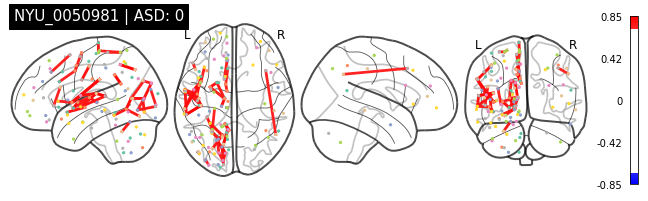

In [90]:
plot_connectome(dataset, 0, atlas)

2


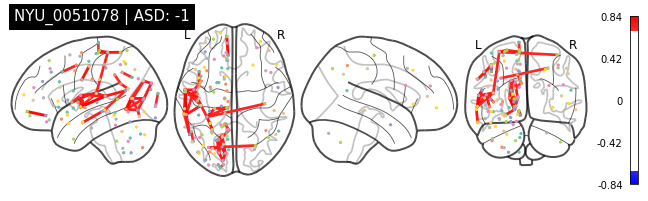

In [91]:
plot_connectome(dataset, 85, atlas)

1


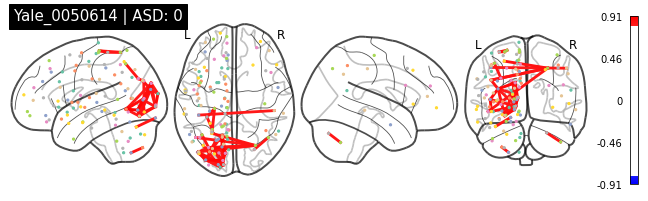

In [92]:
plot_connectome(dataset, 25, atlas)

2


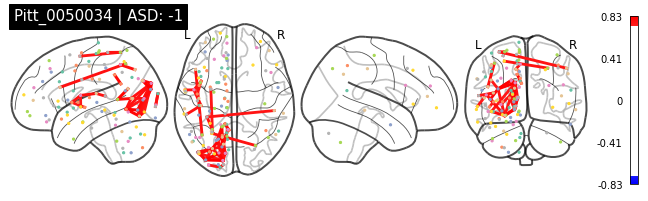

In [93]:
plot_connectome(dataset, 45, atlas)

In [73]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    th = au_corr.loc[au_corr > 0.95]
    print(th)
    return au_corr[0:n]

In [79]:
fc = np.load('abide_fc_dataset_scale122/input/' + dataset.input_files[0])
print(dataset[45][1].item())
df = pd.DataFrame(fc)
get_top_abs_correlations(df, 10)

1.0
Series([], dtype: float64)


98  118    0.847103
16  23     0.825917
46  95     0.824063
18  28     0.811842
22  51     0.811015
    94     0.800948
18  50     0.798573
51  98     0.795237
30  35     0.791752
12  24     0.791338
dtype: float64